Data Pre Processing


#Data Load

In [9]:
import pandas as pd
import numpy as np
# Load the CSV file into a DataFrame
df = pd.read_csv('alzheimers_disease_data.csv')
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [11]:
df.shape

(2149, 35)

Data Cleaning

In [12]:
df.drop(['DoctorInCharge', 'PatientID'], axis=1, inplace=True)
df.shape

(2149, 33)

#Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Train the model
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train_scaled, y_train)


# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6767441860465117


c:\Users\chand\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[222  55]
 [ 84  69]]


In [15]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test is the true labels and y_pred is the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.5564516129032258
Recall: 0.45098039215686275


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       277
           1       0.56      0.45      0.50       153

    accuracy                           0.68       430
   macro avg       0.64      0.63      0.63       430
weighted avg       0.67      0.68      0.67       430



Precision (55.6%) is moderate, meaning the model does a reasonable job of predicting positive cases, but there are many false positives.
Recall (45.1%) is lower, meaning the model misses a significant number of actual positive cases.
F1-Score (49.7%) shows a balance between precision and recall but indicates room for improvement.

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.894363040041528


In [18]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [19]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.4  # Adjust this value
y_pred_new = (y_pred_proba >= threshold).astype(int)


In [20]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score using predicted probabilities
roc_auc_adjusted = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score with adjusted threshold:", roc_auc_adjusted)


ROC-AUC Score with adjusted threshold: 0.8948585451027583


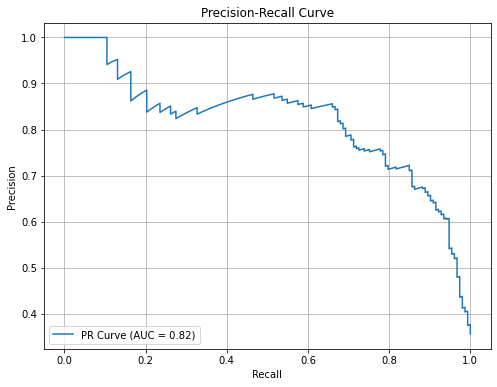

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Generate predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the area under the Precision-Recall curve (PR AUC)
pr_auc = auc(recall, precision)

# Plot the PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()


In [22]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_pred_proba >= 0.3).astype(int)  # Example with a threshold of 0.4
precision_new = precision_score(y_test, y_pred_custom)
recall_new = recall_score(y_test, y_pred_custom)
print(precision_new)
print(recall_new)

0.625
0.9150326797385621


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       277
           1       0.67      0.86      0.76       153

    accuracy                           0.80       430
   macro avg       0.79      0.82      0.80       430
weighted avg       0.83      0.80      0.81       430



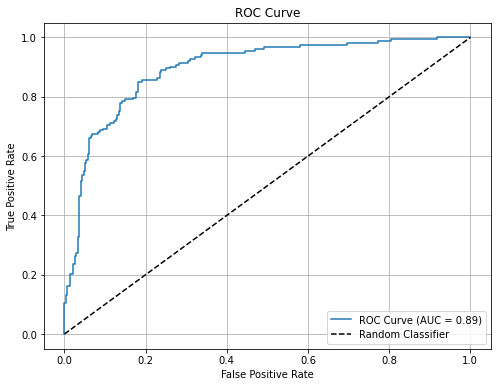

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Gradient Boosting

In [ ]:
#Gradient boosting
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"XGBoost ROC AUC: {roc_auc_xgb:.2f}")


XGBoost ROC AUC: 0.95


In [20]:
from sklearn.metrics import classification_report

y_pred = (y_pred_proba_xgb >= 0.5).astype(int)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



In [21]:
#Tuning
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 2, 5]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='roc_auc', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}


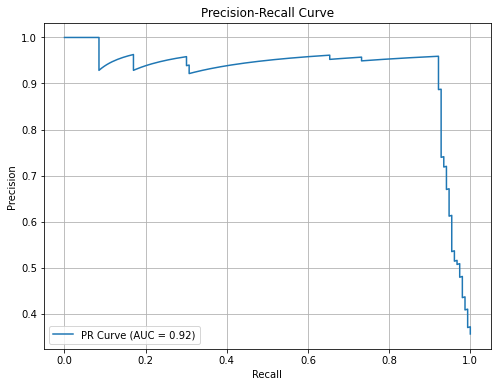

In [24]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation ROC AUC:", scores.mean())


Cross-Validation ROC AUC: 0.9475807007648246


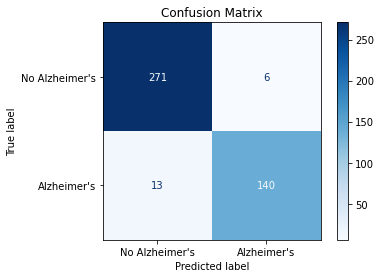

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate binary predictions based on the chosen threshold
threshold = 0.4  # Adjust this as needed
y_pred_binary = (y_pred_proba_xgb >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Alzheimer's", "Alzheimer's"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


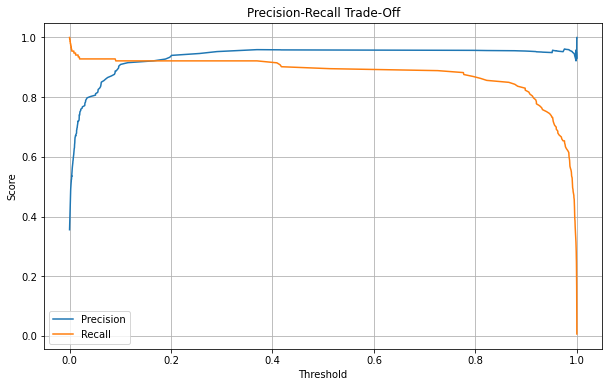

In [27]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

# Plot precision-recall vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Trade-Off")
plt.legend()
plt.grid()
plt.show()


<Figure size 720x432 with 0 Axes>

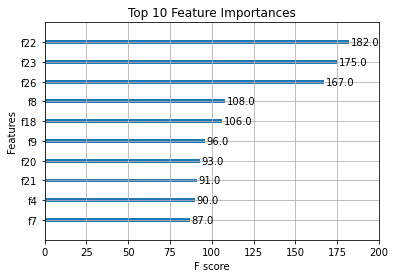

In [ ]:
#Feauture Importance
from xgboost import plot_importance

# Plot the importance of features
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type="weight")
plt.title("Top 10 Feature Importances")
plt.show()


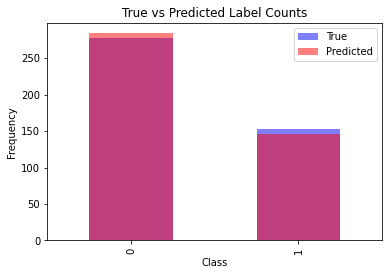

In [30]:
import pandas as pd

# Create a DataFrame for analysis
results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Probability': y_pred_proba_xgb,
    'Predicted Label': y_pred_binary
})

# Bar plot of true vs predicted labels
results_df['True Label'].value_counts().plot(kind='bar', alpha=0.5, label="True", color='blue')
results_df['Predicted Label'].value_counts().plot(kind='bar', alpha=0.5, label="Predicted", color='red')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("True vs Predicted Label Counts")
plt.legend()
plt.show()


In [47]:
from sklearn.metrics import precision_score, recall_score

# Define the threshold and generate predictions based on the custom threshold
threshold = 0.3


y_pred_custom = (y_pred_proba_xgb >= threshold).astype(int)

# Calculate precision and recall for the adjusted predictions
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9591836734693877
Recall: 0.9215686274509803


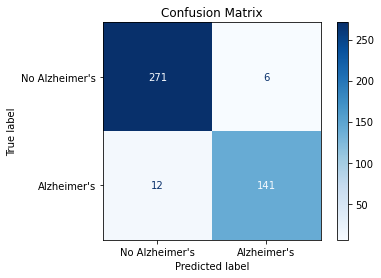

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate binary predictions based on the chosen threshold
threshold = 0.2  # Adjust this as needed
y_pred_binary = (y_pred_proba_xgb >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Alzheimer's", "Alzheimer's"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [49]:
y_pred_test = (xgb_model.predict_proba(X_test_scaled)[:, 1] >= 0.3).astype(int)
print("Recall on Test Set:", recall_score(y_test, y_pred_test))
print("Precision on Test Set:", precision_score(y_test, y_pred_test))


Recall on Test Set: 0.9215686274509803
Precision on Test Set: 0.9591836734693877


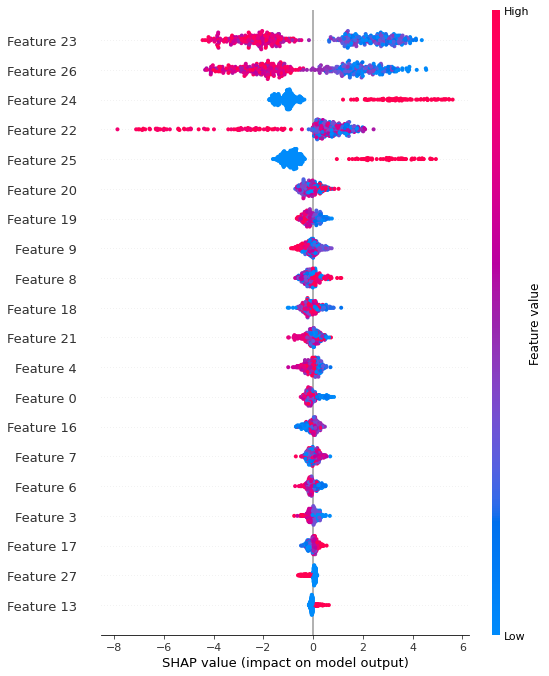

In [53]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled)


'''Interpreting the Plot
Top Features (Feature 23, Feature 26, etc.):

These are the most influential features for the model.
For example:
Feature 23 (Most Important): Has both high positive and negative SHAP values, suggesting it can strongly push predictions in either direction depending on its value.
Feature 26: High values (red) seem to push the prediction toward the positive class.
Feature Value Relationships:

Feature 22: Low values (blue) contribute negatively, while high values (red) push predictions toward the positive class.
Feature 24: Has a similar pattern with most dots on the right-hand side.
Low-Ranking Features (Feature 13, Feature 17, etc.):

These features have little impact on predictions and might be less important for the model.
'''

In [58]:
df_test = df.loc[y_test.index]  # Subset of the DataFrame matching test set indices
for group in df_test['Gender'].unique():
    group_indices = df_test['Gender'] == group  # Filter for this group
    recall = recall_score(y_test[group_indices], y_pred[group_indices])
    print(f"Recall for Gender {group}: {recall:.2f}")


Recall for Gender 1: 0.89
Recall for Gender 0: 0.89


In [56]:
import joblib

joblib.dump(xgb_model, 'alzheimers_model.pkl')


['alzheimers_model.pkl']

In [57]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', scaler),
    ('model', xgb_model)
])
joblib.dump(pipeline, 'prediction_pipeline.pkl')


['prediction_pipeline.pkl']